In [1]:
import warnings
# Suppress warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('adult.data')

display(data)
# The features we will use
features = ['age', 'Workclass', 'fnlwgt', 'Education', 'Education-num', 'Marital-status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss', 'Hours-per-week', 'Native_country'] 
X = data[features]

# The target (predictor)
target = 'Target'
Y = data[target]
display(Y)

# replace missing values
#X["Age"].fillna(np.random.choice(X['Age'][~X['Age'].isna()]),inplace = True)
#X["Embarked"].fillna(np.random.choice(X['Embarked'][~X['Embarked'].isna()]),inplace = True) 
#X.head(5)

,age,Workclass,fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native_country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: Target, Length: 32561, dtype: object

In [3]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder() 
X['Workclass'] = le.fit_transform(X['Workclass'])
X['Education'] = le.fit_transform(X['Education'])
X['Marital-status'] = le.fit_transform(X['Marital-status'])
X['Occupation'] = le.fit_transform(X['Occupation'])
X['Relationship'] = le.fit_transform(X['Relationship'])
X['Race'] = le.fit_transform(X['Race'])
X['Sex'] = le.fit_transform(X['Sex'])
X['Native_country'] = le.fit_transform(X['Native_country'])
Y = le.fit_transform(Y)
X.head(5)

,age,Workclass,fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native_country
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5


In [4]:
from sklearn.model_selection import train_test_split
random_state=1
test_size=0.25

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = test_size, random_state = random_state)

# look at some training data
X_train.head(5)

,age,Workclass,fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native_country
13474,51,4,284211,11,9,6,10,4,4,0,0,0,35,39
28958,36,4,119957,9,13,5,8,4,2,0,0,0,35,39
14735,30,6,164190,14,15,4,10,3,4,1,0,0,40,39
13215,22,2,289982,9,13,4,10,3,4,0,0,0,35,39
13460,41,4,177905,12,14,2,10,0,4,1,0,0,45,39


In [5]:
import numpy as np
#Some intialisations

columns = features +[target]
nColumns = len(columns)

result = pd.DataFrame(np.zeros((nColumns, nColumns)), columns=columns)

train = X_train.copy()
train[target]= Y_train

In [6]:
from scipy.stats.stats import pearsonr
# Apply Pearson correlation on each pair of features.
for col_a in range(nColumns):
    for col_b in range(nColumns):
        result.iloc[[col_a], [col_b]] = round(pearsonr(train.loc[:, columns[col_a]], train.loc[:,  columns[col_b]])[0],2)

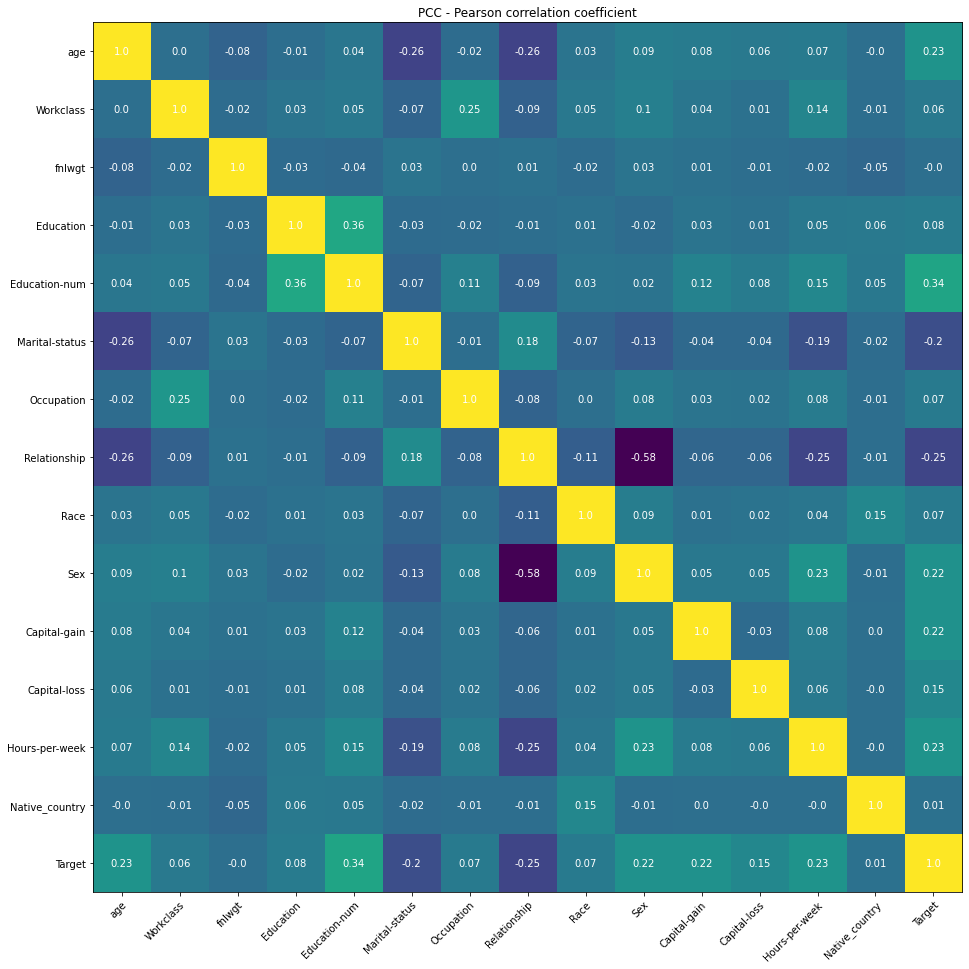

In [7]:
fig, ax = plt.subplots(figsize=(16,16))
im = ax.imshow(result)

#,yticklabels=columns, vmin=-1, vmax=1, annot=True, fmt='.2f', linewidths=.2)

# We want to show all ticks...
ax.set_xticks(np.arange(nColumns))
ax.set_yticks(np.arange(nColumns))

# ... and label them with the respective list entries
ax.set_xticklabels(columns)
ax.set_yticklabels(columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(nColumns):
    for j in range(nColumns):
        text = ax.text(j, i, result.iloc[i, j],ha="center", va="center", color="w")
                   
ax.set_title('PCC - Pearson correlation coefficient')
plt.show()

array([<AxesSubplot:ylabel='Density'>], dtype=object)

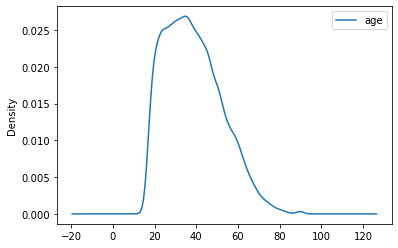

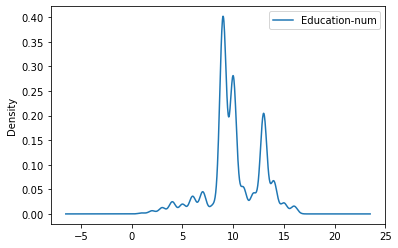

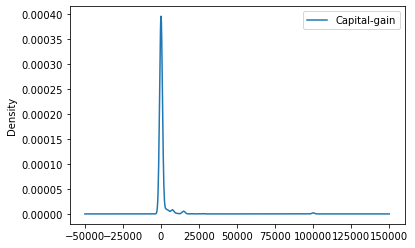

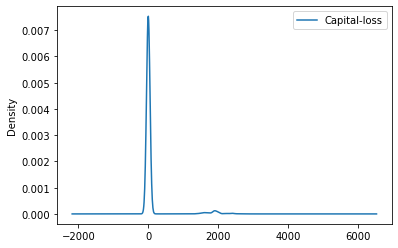

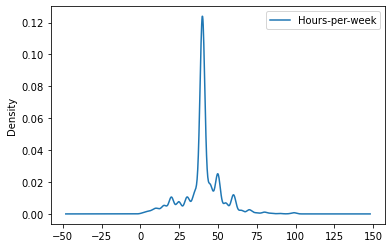

In [13]:
continuous_numeric_features = ['age', 'Education-num', 'Capital-gain', 'Capital-loss', 'Hours-per-week']

data.plot(y = 'age', kind='density', subplots = True)
data.plot(y = 'Education-num', kind='density', subplots = True)
data.plot(y = 'Capital-gain', kind='density', subplots = True)
data.plot(y = 'Capital-loss', kind='density', subplots = True)
data.plot(y = 'Hours-per-week', kind='density', subplots = True)

In [10]:
for column in features:
    print(str(column) + ": " + str(type(data[column][0])))

age: <class 'numpy.int64'>
Workclass: <class 'str'>
fnlwgt: <class 'numpy.int64'>
Education: <class 'str'>
Education-num: <class 'numpy.int64'>
Marital-status: <class 'str'>
Occupation: <class 'str'>
Relationship: <class 'str'>
Race: <class 'str'>
Sex: <class 'str'>
Capital-gain: <class 'numpy.int64'>
Capital-loss: <class 'numpy.int64'>
Hours-per-week: <class 'numpy.int64'>
Native_country: <class 'str'>
